In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# EDA 

## Load data

These are the descriptions of the variables in this dataset:

- Sex: Gender of the Crab - Male, Female and Indeterminate
- Length: Length of the Crab in feet
- Diameter: Diameter of the Crab in feet
- Height: Height of the Crab in feet
- Weight: Weight of the Crab in ounces
- Shucked Weight: Weight without the shell in ounces
- Viscera Weight: Weight that wraps around the crab's abdominal organs in ounces
- Shell Weight: Weight of the Shell in ounces
- Age: Age of the Crab in months

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [4]:
df_train.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
df_train.Sex.nunique()

3

## Data quality

In [8]:
# check duplicates
df_train[df_train.duplicated()]

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age


In [11]:
# count the number of distinct values
for column in df_train.columns:
    print(f"{column}: {df_train[column].nunique()} distinct values" )

id: 74051 distinct values
Sex: 3 distinct values
Length: 144 distinct values
Diameter: 122 distinct values
Height: 65 distinct values
Weight: 3096 distinct values
Shucked Weight: 1766 distinct values
Viscera Weight: 967 distinct values
Shell Weight: 1048 distinct values
Age: 28 distinct values


In [12]:
# missing values
df_train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [13]:
# describe the data
df_train.describe().style.format("{:.2f}")

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.00,74051.00,74051.00,74051.00,74051.00,74051.00,74051.00,74051.00,74051.00
mean,37025.00,1.32,1.02,0.35,23.39,10.10,5.06,6.72,9.97
std,21376.83,0.29,0.24,0.09,12.65,5.62,2.79,3.58,3.18
min,0.00,0.19,0.14,0.00,0.06,0.03,0.04,0.04,1.00
25%,18512.50,1.15,0.89,0.30,13.44,5.71,2.86,3.97,8.00
50%,37025.00,1.38,1.07,0.36,23.80,9.91,4.99,6.93,10.00
75%,55537.50,1.54,1.20,0.41,32.16,14.03,6.99,9.07,11.00
max,74050.00,2.01,1.61,2.83,80.10,42.18,21.55,28.49,29.00


## Univaiate Analysis

In [11]:
data = df_train.copy()
data = data.drop('id', axis=1)

In [13]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

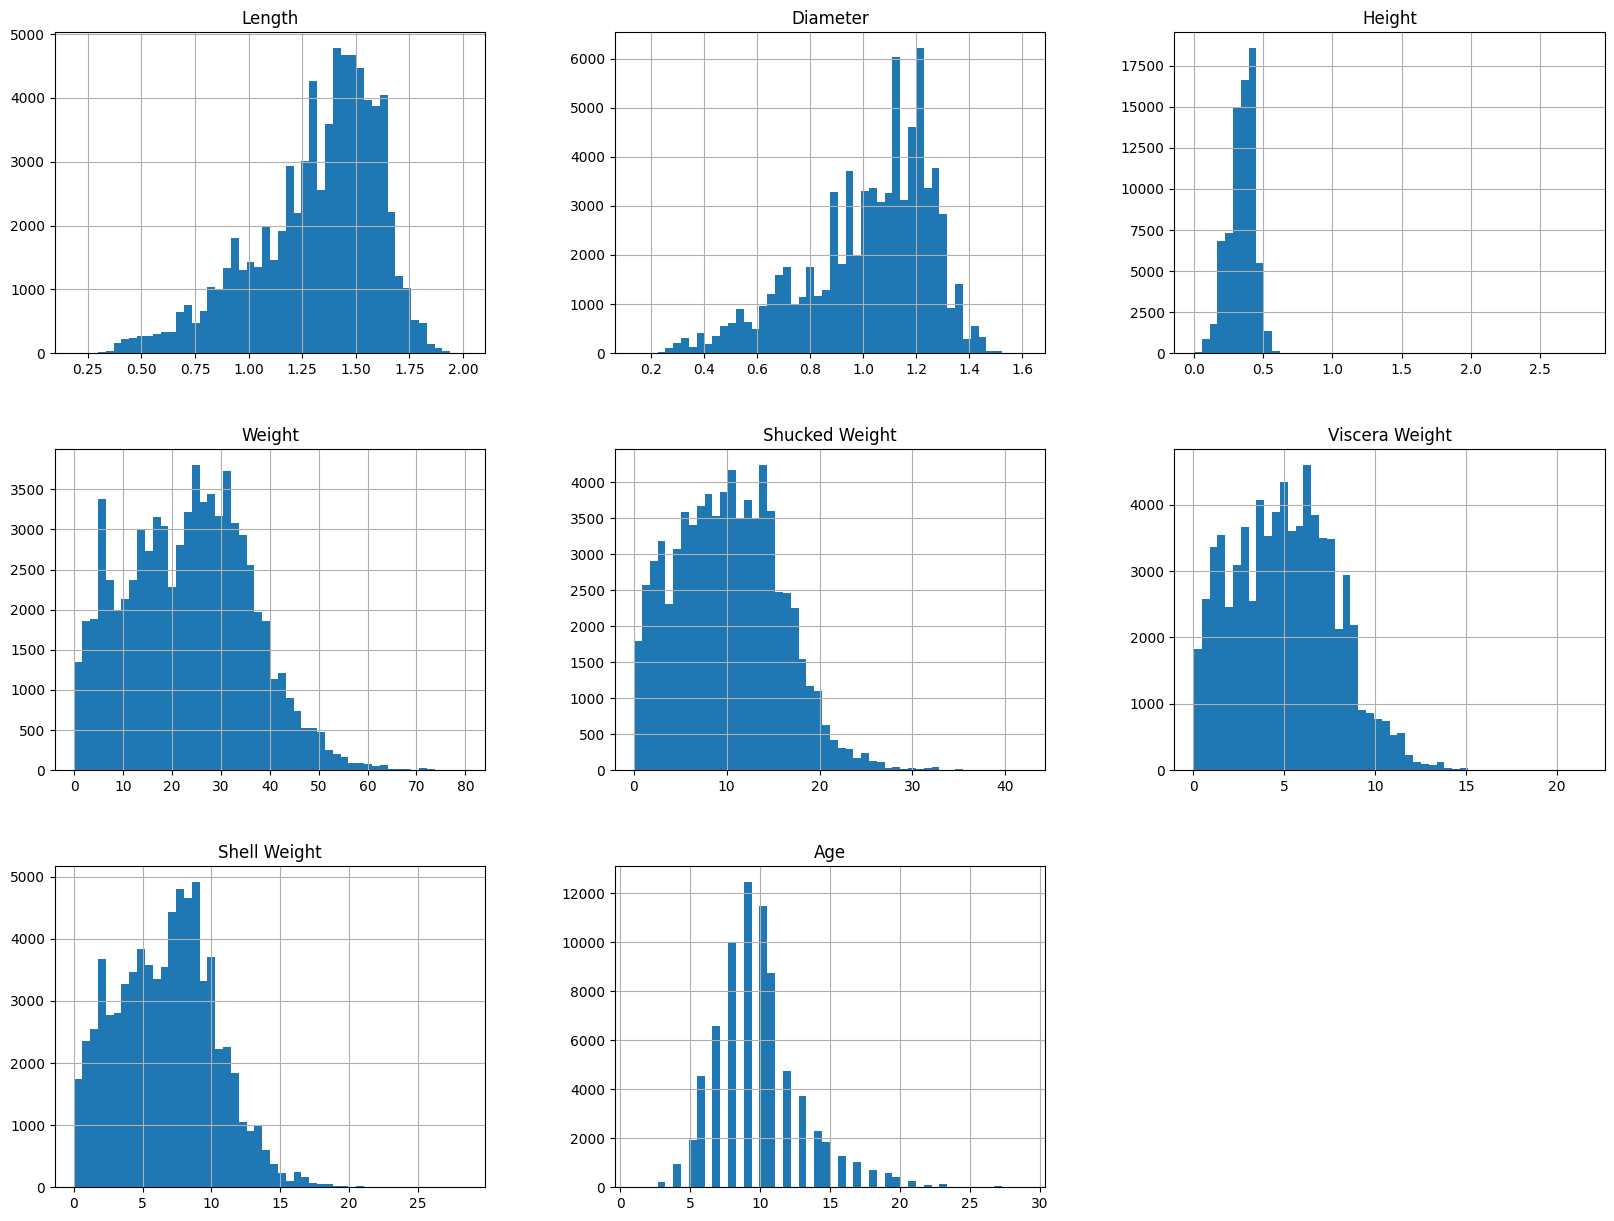

In [15]:
data.hist(bins = 50, figsize=(20, 15))
plt.show()

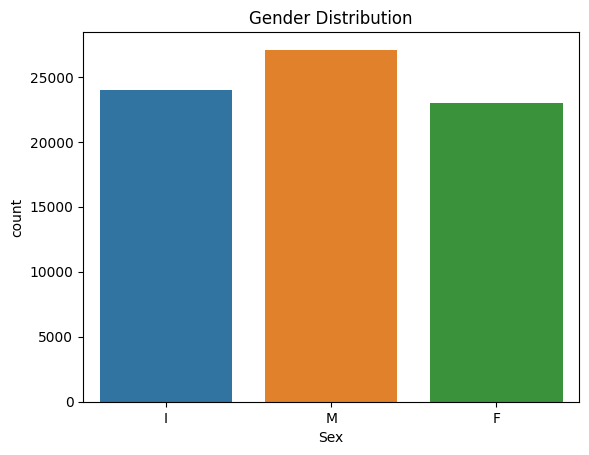

In [15]:
# Bar plot for gender
sns.countplot(x = data['Sex'])
plt.title('Gender Distribution')
plt.show()

## Bivariate Analysis

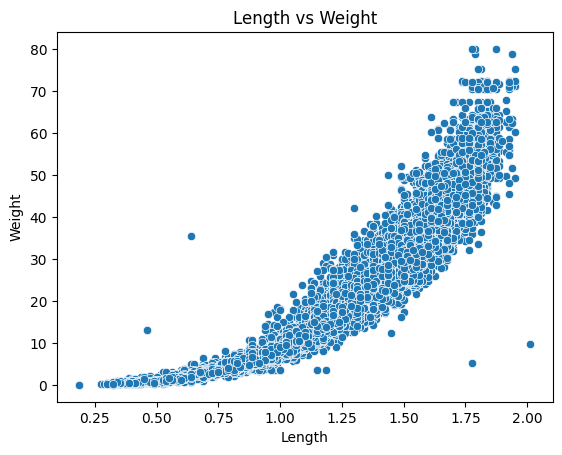

In [18]:
## Scatter plot between Length and Weight
sns.scatterplot(x='Length', y='Weight', data=data)
plt.title('Length vs Weight')
plt.show()

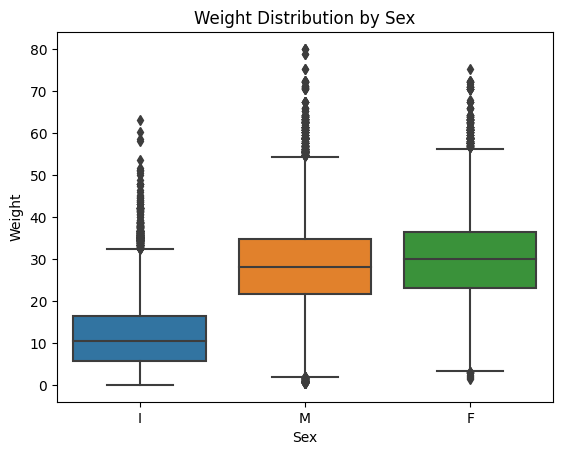

In [19]:
# Box plot of weight by sex
sns.boxplot(x = 'Sex', y = 'Weight', data = data)
plt.title('Weight Distribution by Sex')
plt.show()

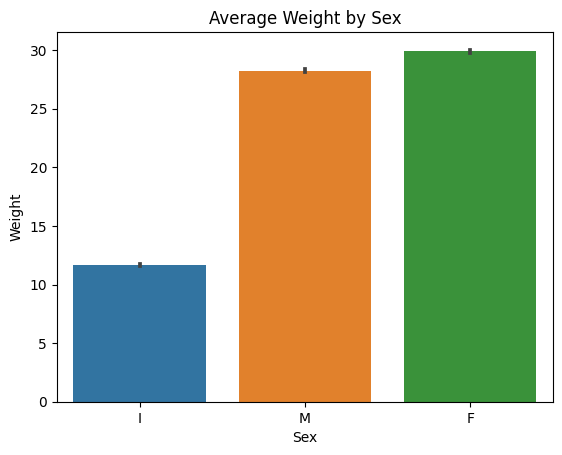

In [21]:
# Box plot of weight by Sex
sns.barplot(x= 'Sex', y = 'Weight', data = data, estimator=np.mean)
plt.title('Average Weight by Sex')
plt.show()

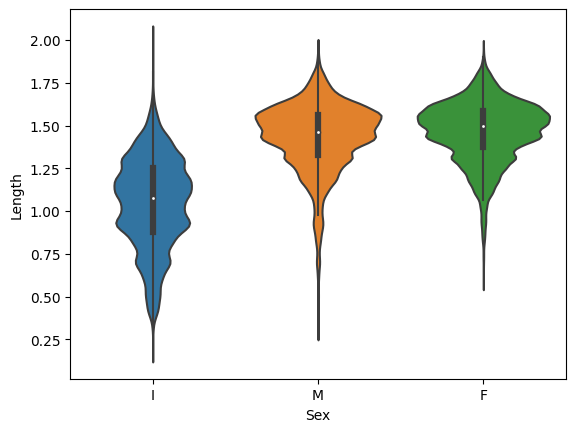

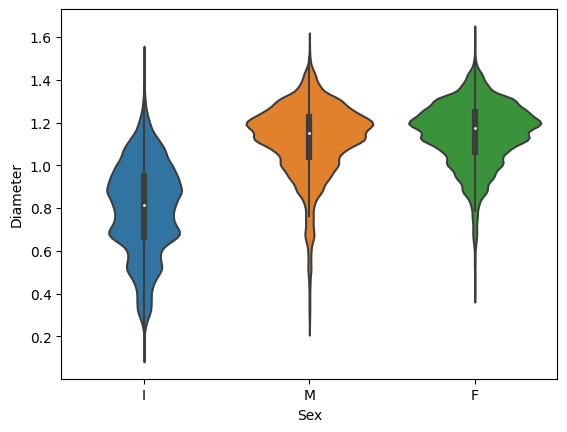

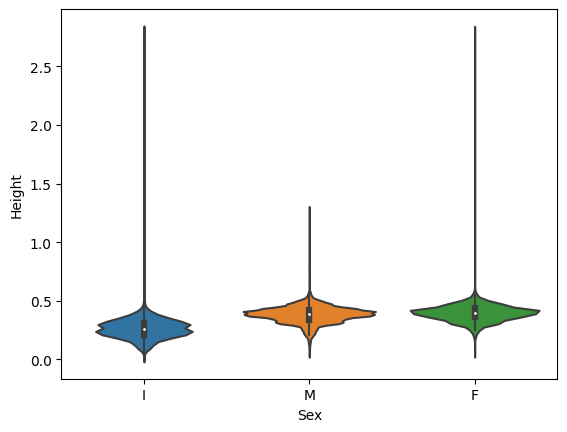

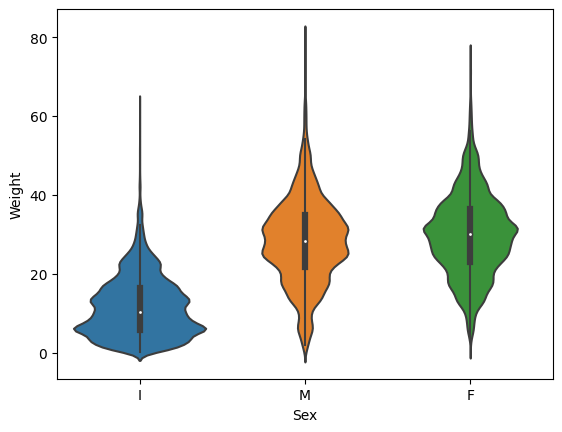

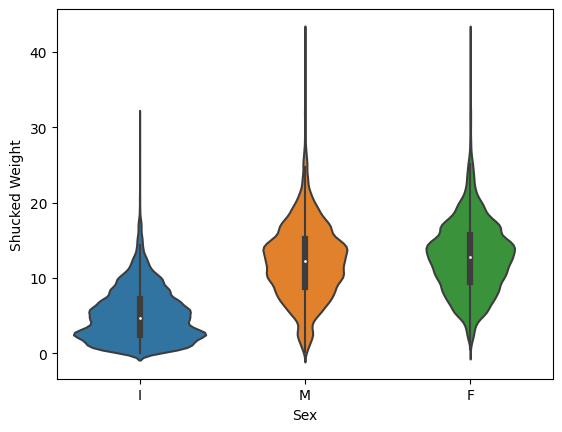

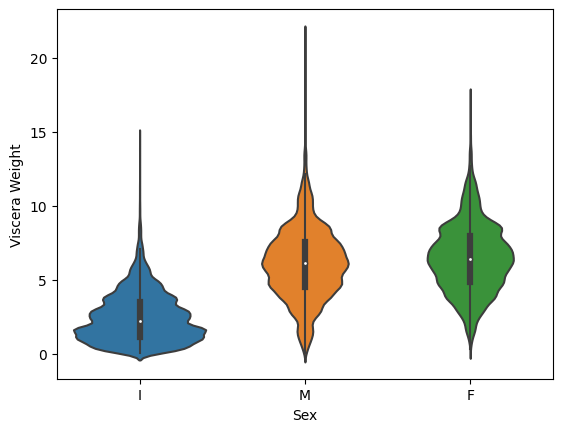

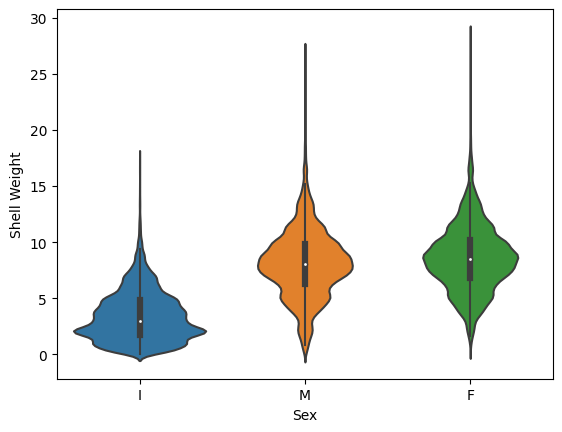

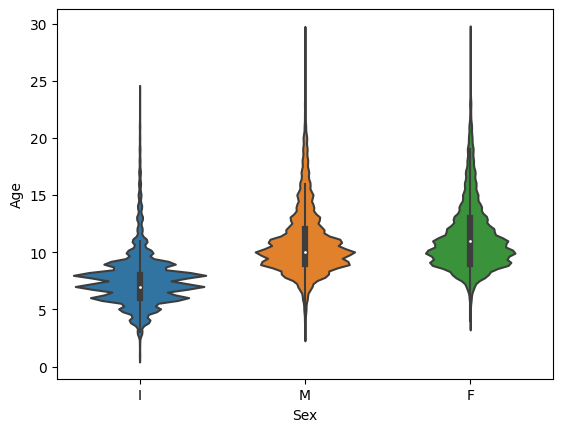

In [25]:
#Violinplot For Each Numeric Variable Split by Sex\
for column in data.select_dtypes(include =[np.number]).columns:
    sns.violinplot(x='Sex', y = column, data = data)
    plt.show()

## Bultivariable Analysis

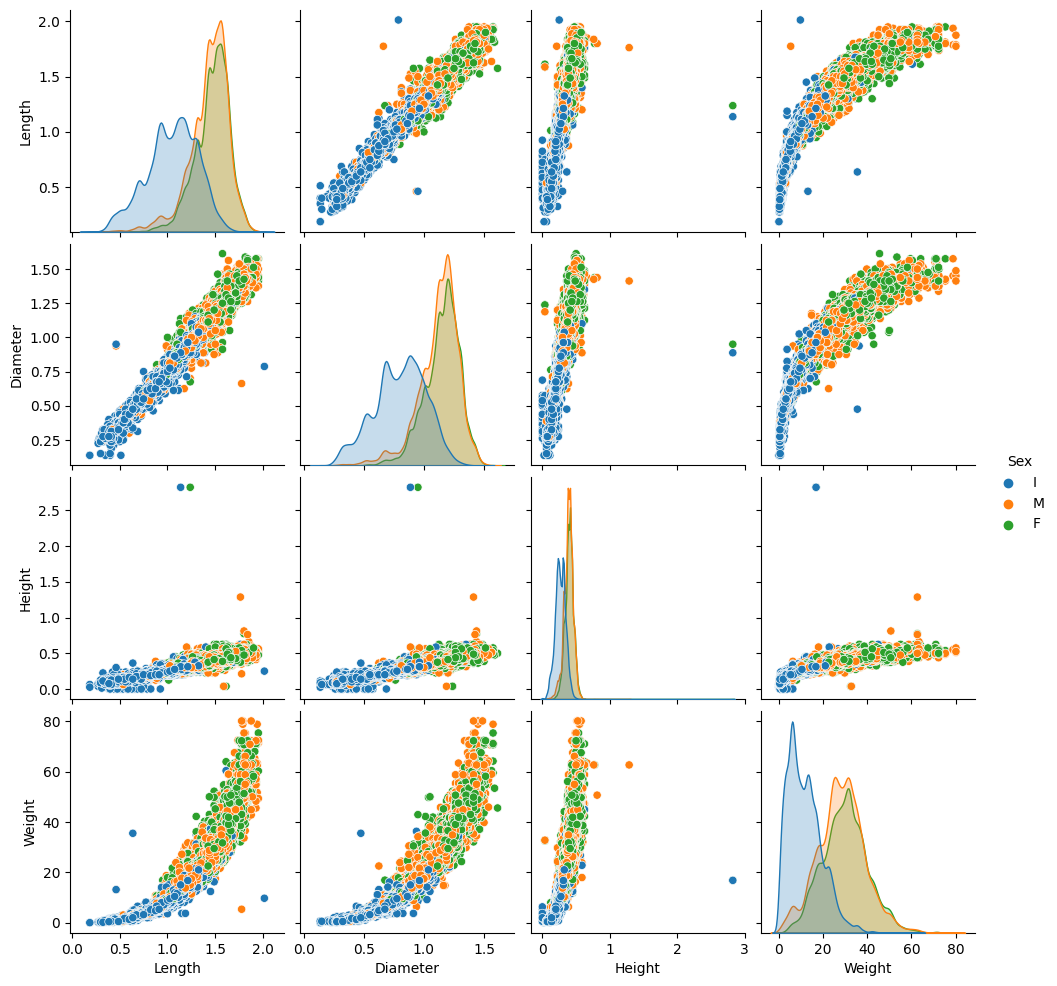

In [28]:
sns.pairplot(data, vars = ['Length','Diameter','Height','Weight'], hue="Sex")

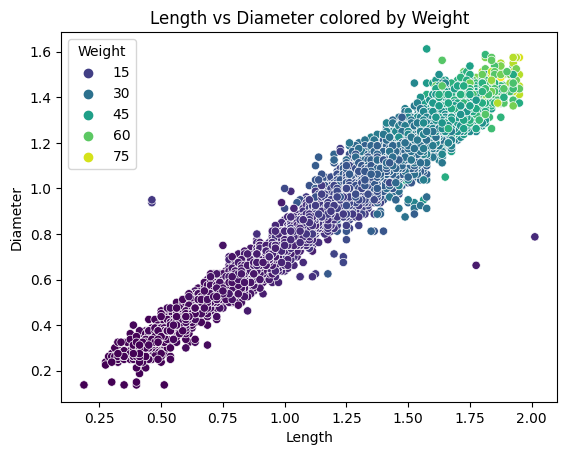

In [30]:
sns.scatterplot(x='Length', y='Diameter', hue='Weight', data=data, palette='viridis')
plt.title('Length vs Diameter colored by Weight')
plt.show()

## Multivartiate Analysis

<AxesSubplot:xlabel='Length', ylabel='Weight'>

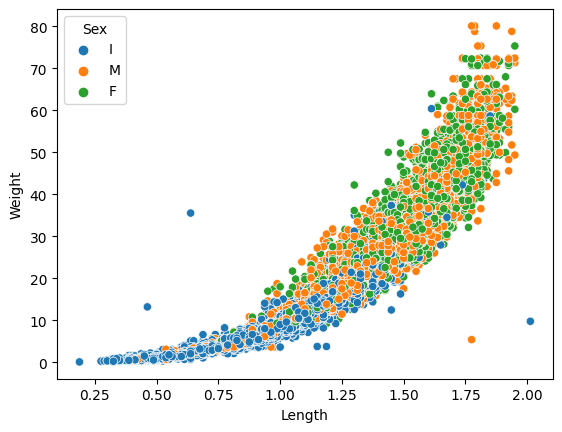

In [31]:
sns.scatterplot(x = 'Length', y = 'Weight', hue='Sex', data = data)

<AxesSubplot:xlabel='Diameter', ylabel='Weight'>

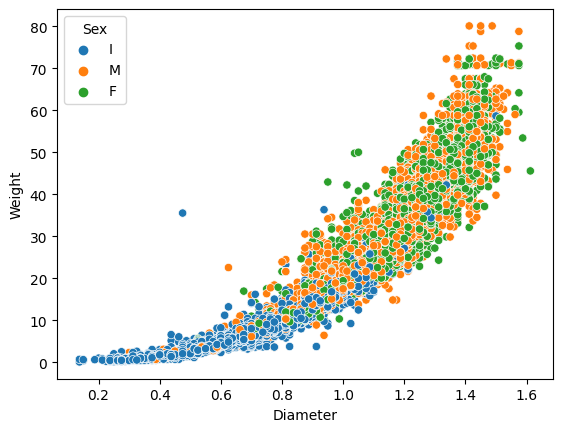

In [33]:
sns.scatterplot(x='Diameter', y='Weight', hue='Sex', data=data)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

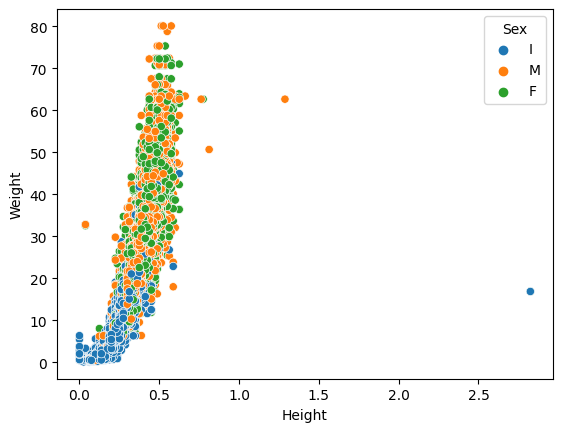

In [34]:
sns.scatterplot(x='Height', y='Weight', hue='Sex', data=data)

<AxesSubplot:xlabel='Age', ylabel='Shell Weight'>

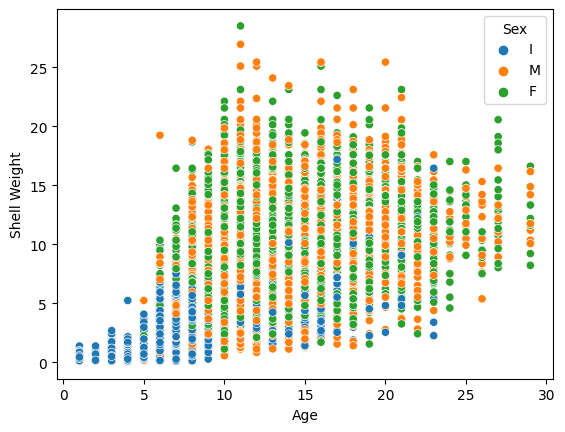

In [35]:
sns.scatterplot(x='Age', y='Shell Weight', hue='Sex', data=data)

<AxesSubplot:xlabel='Age', ylabel='Shucked Weight'>

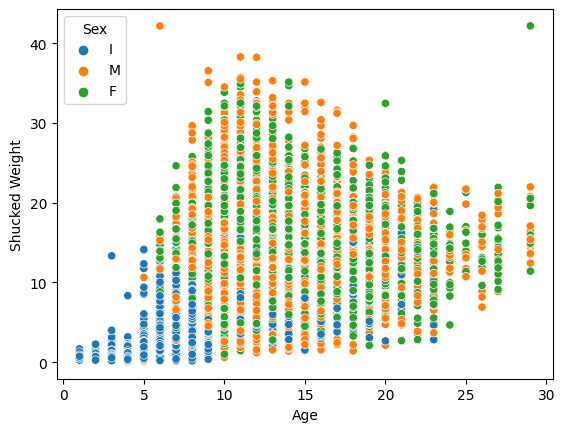

In [37]:
sns.scatterplot(x='Age', y='Shucked Weight', hue='Sex', data=data)

<AxesSubplot:xlabel='Age', ylabel='Viscera Weight'>

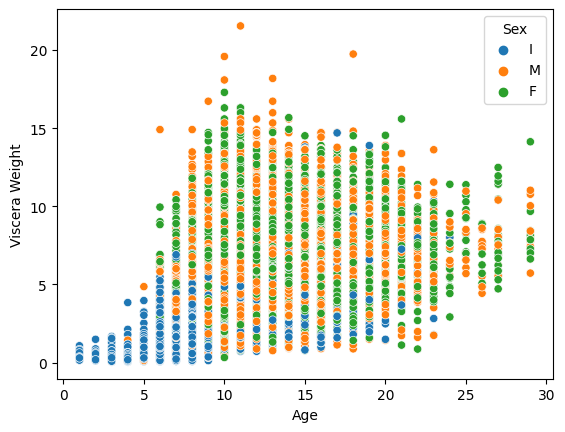

In [39]:
sns.scatterplot(x='Age', y='Viscera Weight', hue='Sex', data=data)

# Correlation

In [45]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'Sex')

In [46]:
data.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9,0,1,0
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8,0,1,0
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9,0,0,1
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11,1,0,0
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8,0,1,0


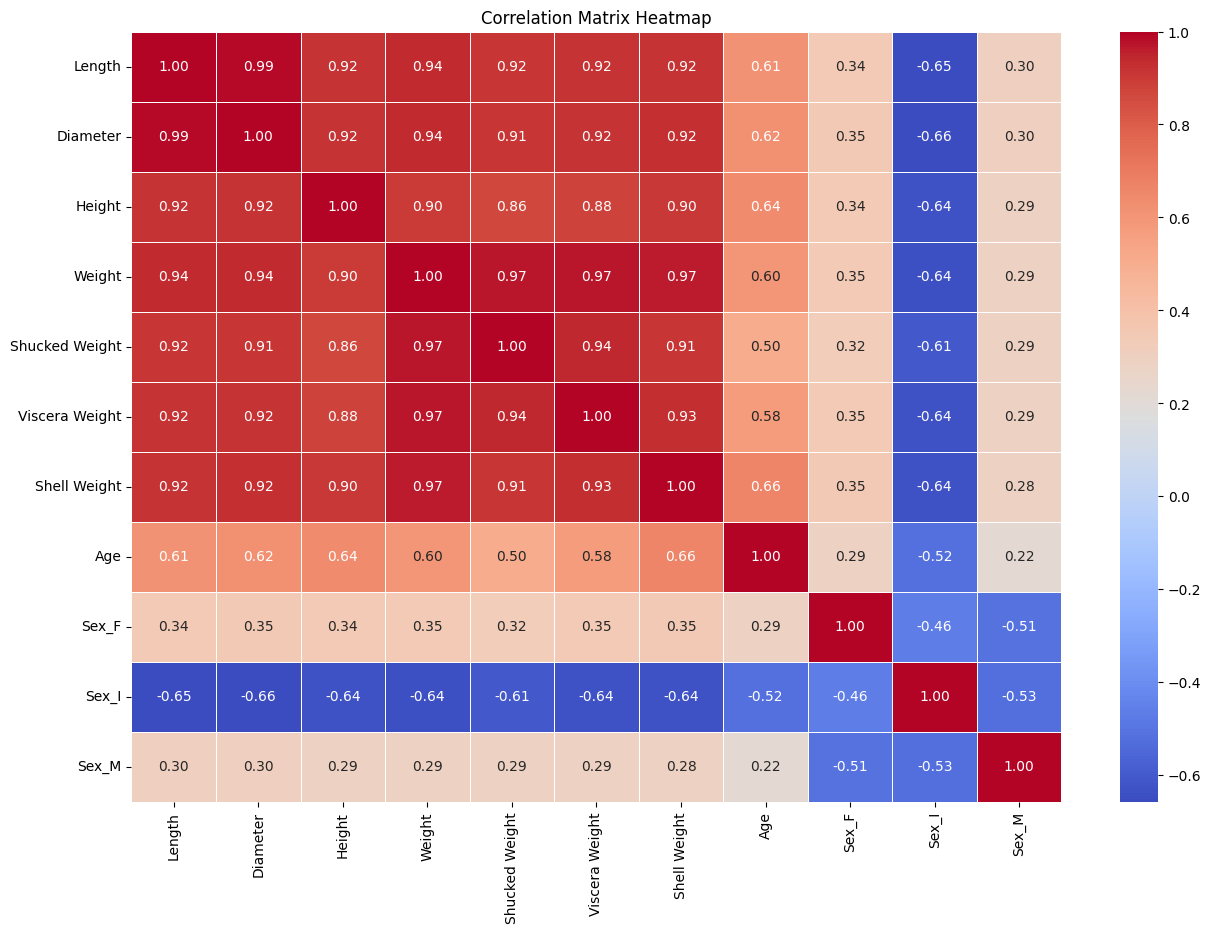

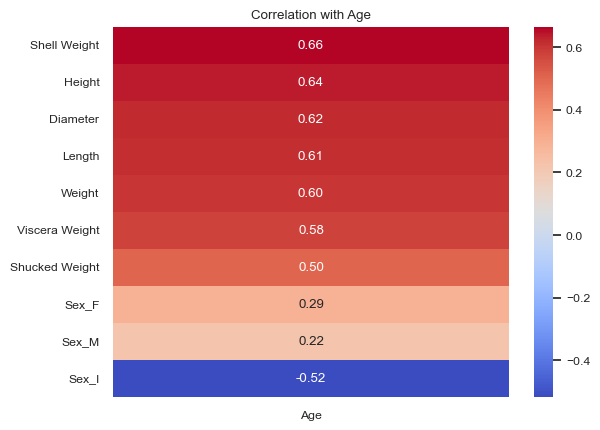

In [48]:
correlation_matrix = data.corr()

# Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.02f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Graph II
# Create a heat map of the correlations with the target column
corr = data.corr()
target_corr = corr['Age'].drop('Age')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending = False)

sns.set(font_scale = 0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlation with Age")
plt.show()